In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import glob
import os

from sklearn.preprocessing import Imputer

In [20]:
header = ['cg_island', 'Beta_value', 'Chromosome', 'Start','End', 'Gene_Symbol', 'Gene_Type', 'Transcript_ID',
         'Position_to_TSS', 'CGI_Coordinate', 'Feature_Type']
sample_orig = pd.read_csv('./sample.meth.txt', delim_whitespace=True, names=header, skiprows=[0])
sample = sample_orig[['cg_island','Beta_value','Gene_Symbol']]

In [21]:
cpg2gene_all = sample_orig[['cg_island','Gene_Symbol', 'Chromosome', 'Start','End']]

In [22]:
path= "./download/tumor"
allfiles = glob.glob(path + "/*27*.txt")
print "Total number of tumor files :" ,len(allfiles)
allfiles[0:3]

Total number of tumor files : 153


['./download/tumor/jhu-usc.edu_COAD.HumanMethylation27.5.lvl-3.TCGA-AA-3678-01A-01D-0904-05.gdc_hg38.txt',
 './download/tumor/jhu-usc.edu_COAD.HumanMethylation27.6.lvl-3.TCGA-AA-3842-01A-01D-1020-05.gdc_hg38.txt',
 './download/tumor/jhu-usc.edu_COAD.HumanMethylation27.6.lvl-3.TCGA-AA-3710-01A-01D-1020-05.gdc_hg38.txt']

In [65]:
out = sample[['cg_island']]
for f in allfiles :
    base = os.path.basename(f)
    tcga_id = base.split('.')[5]
    patient_id = tcga_id[:12]
    header = ['cg_island', 'Beta_value', 'Chromosome', 'Start','End', 'Gene_Symbol', 'Gene_Type', 'Transcript_ID',
         'Position_to_TSS', 'CGI_Coordinate', 'Feature_Type']
    in1 = pd.read_csv(f, delim_whitespace=True, names=header, skiprows=[0])
    in1 = in1[['cg_island','Beta_value']]   
    in1.columns = ['cg_island',patient_id]
    out = pd.merge(out, in1, how='inner')

out = out.T

In [66]:
out.head(5)

,0,1,2,3,4,5,6,7,8,9,...,27568,27569,27570,27571,27572,27573,27574,27575,27576,27577
cg_island,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
TCGA-AA-3678,0.684956,0.148226,0.0960229,0.670602,NaN,0.0236913,0.986069,0.0196366,0.0132854,0.586151,...,0.408423,0.0483682,NaN,0.0225978,0.166501,0.0439282,0.437743,0.0118735,0.0246758,0.0156982
TCGA-AA-3842,0.617378,0.180173,0.0605337,0.628199,NaN,0.0285059,0.989332,0.0125486,0.0120677,0.490204,...,0.12159,0.0175226,NaN,0.0203654,0.166245,0.0942176,0.352512,0.0109618,0.0244037,0.0251451
TCGA-AA-3710,0.711976,0.87371,0.257039,0.547781,NaN,0.0635009,0.986662,0.0156342,0.0125842,0.550283,...,0.317879,0.0338761,NaN,0.0299341,0.217547,0.0642487,0.404434,0.0114839,0.023324,0.0246841
TCGA-AA-A00Z,0.595928,0.112892,0.167028,0.696424,NaN,0.0219489,0.992336,0.00932837,0.0113393,0.602319,...,0.226055,0.0245489,NaN,0.0203201,0.202239,0.0281533,0.385399,0.00723988,0.0187901,0.0133035


In [67]:
out.columns = out.loc['cg_island']
out.drop(['cg_island'], inplace=True)
out.head(5)

cg_island,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
TCGA-AA-3678,0.684956,0.148226,0.0960229,0.670602,NaN,0.0236913,0.986069,0.0196366,0.0132854,0.586151,...,0.408423,0.0483682,NaN,0.0225978,0.166501,0.0439282,0.437743,0.0118735,0.0246758,0.0156982
TCGA-AA-3842,0.617378,0.180173,0.0605337,0.628199,NaN,0.0285059,0.989332,0.0125486,0.0120677,0.490204,...,0.12159,0.0175226,NaN,0.0203654,0.166245,0.0942176,0.352512,0.0109618,0.0244037,0.0251451
TCGA-AA-3710,0.711976,0.87371,0.257039,0.547781,NaN,0.0635009,0.986662,0.0156342,0.0125842,0.550283,...,0.317879,0.0338761,NaN,0.0299341,0.217547,0.0642487,0.404434,0.0114839,0.023324,0.0246841
TCGA-AA-A00Z,0.595928,0.112892,0.167028,0.696424,NaN,0.0219489,0.992336,0.00932837,0.0113393,0.602319,...,0.226055,0.0245489,NaN,0.0203201,0.202239,0.0281533,0.385399,0.00723988,0.0187901,0.0133035
TCGA-AA-3833,0.592854,0.731297,0.150545,0.580217,NaN,0.0444534,0.986693,0.0193087,0.0112794,0.563173,...,0.347932,0.049752,NaN,0.0213755,0.24047,0.040583,0.438733,0.0122579,0.0209333,0.0214786


In [32]:
out.shape

(153, 27578)

In [50]:
out_1 = out.dropna(axis=1, thresh = 0.8*len(out))
#out_1.shape
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_out = pd.DataFrame(fill_NaN.fit_transform(out_1))
imputed_out.columns = out_1.columns
#imputed_out['Patient_id'] = out_1.index
imputed_out.head()

cg_island,cg00000292,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,...,cg27652350,cg27653134,cg27654142,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
0,0.684956,0.148226,0.096023,0.670602,0.023691,0.986069,0.019637,0.013285,0.586151,0.932448,...,0.800314,0.408423,0.048368,0.022598,0.166501,0.043928,0.437743,0.011873,0.024676,0.015698
1,0.617378,0.180173,0.060534,0.628199,0.028506,0.989332,0.012549,0.012068,0.490204,0.908893,...,0.897113,0.121590,0.017523,0.020365,0.166245,0.094218,0.352512,0.010962,0.024404,0.025145
2,0.711976,0.873710,0.257039,0.547781,0.063501,0.986662,0.015634,0.012584,0.550283,0.928097,...,0.658352,0.317879,0.033876,0.029934,0.217547,0.064249,0.404434,0.011484,0.023324,0.024684
3,0.595928,0.112892,0.167028,0.696424,0.021949,0.992336,0.009328,0.011339,0.602319,0.964439,...,0.766295,0.226055,0.024549,0.020320,0.202239,0.028153,0.385399,0.007240,0.018790,0.013303
4,0.592854,0.731297,0.150545,0.580217,0.044453,0.986693,0.019309,0.011279,0.563173,0.917471,...,0.695006,0.347932,0.049752,0.021375,0.240470,0.040583,0.438733,0.012258,0.020933,0.021479


In [51]:
print imputed_out.shape
bval_df = imputed_out.copy()
bval_df['Patient_id'] = out_1.index
bval_df.head()
imputed_out.head()

(153, 24965)


cg_island,cg00000292,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,...,cg27652350,cg27653134,cg27654142,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
0,0.684956,0.148226,0.096023,0.670602,0.023691,0.986069,0.019637,0.013285,0.586151,0.932448,...,0.800314,0.408423,0.048368,0.022598,0.166501,0.043928,0.437743,0.011873,0.024676,0.015698
1,0.617378,0.180173,0.060534,0.628199,0.028506,0.989332,0.012549,0.012068,0.490204,0.908893,...,0.897113,0.121590,0.017523,0.020365,0.166245,0.094218,0.352512,0.010962,0.024404,0.025145
2,0.711976,0.873710,0.257039,0.547781,0.063501,0.986662,0.015634,0.012584,0.550283,0.928097,...,0.658352,0.317879,0.033876,0.029934,0.217547,0.064249,0.404434,0.011484,0.023324,0.024684
3,0.595928,0.112892,0.167028,0.696424,0.021949,0.992336,0.009328,0.011339,0.602319,0.964439,...,0.766295,0.226055,0.024549,0.020320,0.202239,0.028153,0.385399,0.007240,0.018790,0.013303
4,0.592854,0.731297,0.150545,0.580217,0.044453,0.986693,0.019309,0.011279,0.563173,0.917471,...,0.695006,0.347932,0.049752,0.021375,0.240470,0.040583,0.438733,0.012258,0.020933,0.021479


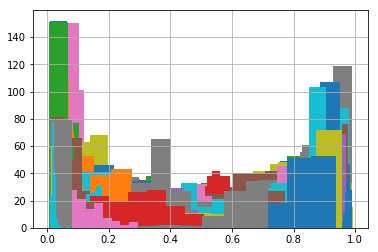

In [54]:
for i in np.arange(200) :
    col = imputed_out.columns
    col_test = (random.choice(col))
    imputed_out[col_test].hist()

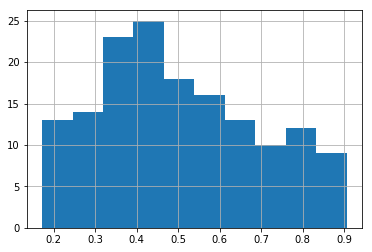

In [62]:
col = imputed_out.columns
col_test = (random.choice(col))
#print imputed_out[col_test]
imputed_out[col_test].hist()

In [63]:
def func(col):
    mu=col.mean()
    sigma=col.std()
    bins1 = [-np.inf,(mu-0.7*sigma),mu,(mu+0.7*sigma),np.inf]
    bins2 = sorted(set(bins1)) # in case there are duplicate arguments in bin - if coloumn has all zeroes 
    group_names = np.arange(1,len(bins2))
    #print  bins2
    return pd.cut(col,bins=bins2, labels=group_names)

imputed_out = imputed_out.apply(func, axis=0)
imputed_out['Patient_id'] = out_1.index
imputed_out.index = out_1.index
imputed_out.head()

cg_island,cg00000292,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,...,cg27653134,cg27654142,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659,Patient_id
TCGA-AA-3678,3,2,2,2,2,2,4,4,2,2,...,4,3,3,2,3,2,4,2,2,TCGA-AA-3678
TCGA-AA-3842,2,2,2,1,2,3,2,3,1,1,...,1,2,2,2,4,1,3,2,4,TCGA-AA-3842
TCGA-AA-3710,3,4,3,1,4,2,3,3,2,2,...,3,2,4,3,4,2,3,2,4,TCGA-AA-3710
TCGA-AA-A00Z,2,2,2,2,1,4,1,3,3,3,...,2,2,2,3,1,2,1,2,1,TCGA-AA-A00Z
TCGA-AA-3833,2,4,2,1,4,2,4,3,2,1,...,3,3,2,4,2,2,4,2,4,TCGA-AA-3833


In [64]:
j=imputed_out.isnull().any()
j.value_counts()

False    24966
dtype: int64

In [87]:
RTR_RFU_6v_142cases = pd.read_csv('./merge_clinical_meth/RTR_RFU_6v_142cases.csv', delim_whitespace=True)
RTR_RFU_7v_101cases = pd.read_csv('./merge_clinical_meth/RTR_RFU_7v_101cases.csv', delim_whitespace=True)
map_caseno_tcga = pd.read_csv('./merge_clinical_meth/tcga_caseID_short_171.lst', delim_whitespace=True)

RTR_RFU_6v_142cases = pd.merge(map_caseno_tcga, RTR_RFU_6v_142cases, how='inner')
RTR_RFU_7v_101cases = pd.merge(map_caseno_tcga, RTR_RFU_7v_101cases, how='inner')


RTR_RFU_7v_101cases.rename(columns={'TCGA':'Patient_id'}, inplace=True)
RTR_RFU_6v_142cases.rename(columns={'TCGA':'Patient_id'}, inplace=True)
RTR_RFU_6v_142cases.head()

,Patient_id,CaseID,CASE_NO,GRADE,LOCALIZATION,STAGE,Patient_alive,Relapse_free,Chemotherapy
0,TCGA-AA-3526,A1888-Tp2,A1888,1,5,0,1,1,0
1,TCGA-AA-3831,B1164-Tp1,B1164,2,5,1,1,0,0
2,TCGA-AA-A01C,A2733,A2733,1,4,2,0,0,0
3,TCGA-AA-3549,A2327-Tp1,A2327,1,3,0,0,0,1
4,TCGA-AA-3696,A2779-Tp2,A2779,1,5,3,0,0,0


In [89]:
out_6cv = pd.merge(RTR_RFU_6v_142cases, imputed_out, how = 'inner')
out_7cv = pd.merge(RTR_RFU_7v_101cases, imputed_out, how = 'inner')
out_6cv_bval = pd.merge(RTR_RFU_6v_142cases, bval_df, how = 'inner')

out_6cv.drop(['CaseID'], axis=1, inplace=True)
out_7cv.drop(['CaseID'], axis=1, inplace=True)
out_6cv_bval.drop(['CaseID'], axis=1, inplace=True)

print out_6cv.shape, out_7cv.shape

(125, 24973) (90, 24974)


In [93]:
#out_7cv.head()
#out_6cv_bval.head()
#out_6cv_bval.to_csv('./merge_clinical_meth/COAD_methylation27_6CV_125cases_bval.txt', index=False, sep = '\t')

In [21]:
#out_6cv.to_csv('./merge_clinical_meth/COAD_methylation27_6CV_125cases.txt', index=False, sep = '\t')
#out_7cv.to_csv('./merge_clinical_meth/COAD_methylation27_7CV_90cases.txt', index=False, sep = '\t')

In [23]:
#out_6cv.drop(['CASE_NO','Patient_id'], axis=1, inplace=True)
#out_7cv.drop(['CASE_NO','Patient_id'], axis=1, inplace=True)

#out_6cv.to_csv('./merge_clinical_meth/COAD_methylation27_6CV_125cases_DeltaIn.txt', index=False, header=False, sep = '\t')
#out_7cv.to_csv('./merge_clinical_meth/COAD_methylation27_7CV_90cases_DeltaIn.txt', index=False, header=False, sep = '\t')